<img src="AW&H2015.png" style="float: left">

<img src="flopylogo.png" style="float: center">

# With great power comes great responsibility: Addressing the ill-posed highly parameterized problem with our second line of defense Tikhonov regularization

We are now moving up the simplicity-complexity curve because now we have many more parameters, even more than our observations.  Have we passed the sweetspot?  

<img src="Hunt1998_sweetspot.png" style="float: center">


Again, it is not simply the number of parameters that is at issue.  The better way to think of it is that we just want to avoid "living beyond our means". That is, we do not bring more parameters to bear than we have the ability to constrain.  We constrain them observations as we have seen so far, but we also know things about the system that are not hard data like measurements.  This "soft-knowledge" can also be applied to  constrain our parameters through a mechanism called __"Tikhonov regularization"__.  In this formulation of the inverse problem, we add a second term to our "best fit" metric Phi. This second term reflects the deviation from our soft-knowledge of the system, and is a penalty to our fit. Here's how it looks using the Anderson et al. (2015) forumlation:

<img src="tik-reg_eq9.8.png" style="float: center">


As first term after the equal sign is our __measurement objective function__, which we've been working with all week.  The last term on the right is called the __"regularization objective function"__. These 2 terms combine to create a __total Phi__ on the left.  __Now Total Phi is what we minimize__, which means we are minimizing our observed-to-simulated residuals __AND__ the deviation from soft-knowledge.  So in this way Tikhonov regularization is a "dual-constrained minimization".  

Anderson et al. (2015) look a little closer at this in equation 9.9:


<img src="tik-reg_eq9.9.png" style="float: center">

The first term to the right of the equals sign is the measurement objective function from
Eqn (9.6), which is calculated as the sum of squared weighted residuals, where *n* residuals,
*ri*, are calculated from hard knowledge and wi are their respective weights. The second
term quantifies the penalty resulting from deviations from soft knowledge as the sum
of *q* deviations from *j* soft knowledge conditions *fj*, where *fj* is a function of model parameters
*p*. A calibrated model, therefore, is found by minimizing both the measurement
objective function (hard data) and the soft knowledge penalty.

### Take-home point #1 from these equations: 

When Tikhonov is set up correctly, PEST should only deviate from the preferred condition when there is a suffient improvement in our fit to the observations (= the measurement objective function).  

### Take-home point #2 from these equations:  

The two contributors to our total phi are __*carried separately in the parameter estimation*__.  This is important:  in olden days only one objective function was used; deviations from "prior information" - i.e, the preferred conditions - directly penalized the *measurement* objective function.  However, when something is lumped it cannot be split.  With one combined ojbective function the modeler could not track what the parameter estimation was responding to - the change in fit or the change in adherence to preferred conditions? And it was difficult to know how to *a priori* weight deviations from preferred conditions appropriately so that they were seen in the parameter estimation but did not drown out the information in the observations.  The dual constrained optimization of Tikhonov regularization obivates these problems. So although our regularization information is found in the ``prior_information`` section In the PEST control file we append the letters "regul" to the parameter group name to let PEST know we are using this superior Tikhonov regularization form of prior information. 




## How do we express soft-knowledge quantiatively so we can minimize it?

We add preferred conditions.  These are typically:

### 1) *preferred  value* - "I believe this Kh parameter is around 1 m/d"

### 2) *preferred difference* - "I believe  this area has a Kh 10 m/d higher than that area" 

One of the most useful preferred condition for collapsing all these parameters to fewer bins is a special case of preferred difference where the difference = 0.  This is often called: __"preferred homogeneity"__ -  which equates to something along the lines of "I believe this area has homogeneous Kh" 

Of these, __preferred value__ is the easiest implement, and least memory intensive, preferred condition. Simply run the PEST utility _addreg1.exe_ on your PEST control file.  pyemu has similar functionality called "*__zero_order_tikhonov__*". But make sure the initial values represent your soft-knowledge!

In pyemu also has preferred difference available - look for *"__first_order_pearson_tikhonov__"*.  We'll see both of these in this notebook.

### Pilot point regularization can be propogated to other pilot points, or not.

Here are two examples from Anderson et al. (2015).  For "preferred value" __(below (a), left)__ there is no cross-talk between pilot points.  The initial parameter value of each pilot point is the preferred value.  For preferred difference __(below (a), right)__, there is a radius of influence that connects the pilot point regularization (think correlation length from geostatistics).  


<img src="Fig9.15a_Muffles_pp.png" style="float: center">











### Likewise, pilot-point regularization can also be grouped or limited to specific areas.  For example, if the geology of a site suggests distinct units you can only apply the preferred difference to just the zone:

<img src="Fig9.15b_Kyle_Larry_pp.png" style="float: center">


Here's the caption from Anderson et al. (2015) for posterity:  Figure 9.15 Pilot Points. (a) Network of pilot points in a watershed-scale groundwater flow model (left); linkages between pilot points (right) used to calculate Tikhonov regularization constraints for preferred homogeneity (modified from Muffels, 2008). (b) Network of pilot points used to represent two hydraulic conductivity zones where Tikhonov regularization is applied to pilot points within the same zone (modified from Davis and Putnam, 2013).

## But there is more to think about:

Just like our observations, our preferred conditions are given a weight.  Typically it is uniform (usually 1) - this is what the PEST utility *addreg1.exe* does. On top of this, typically we have the regularization objective function set up to adjust the weights of the different parameter groups during the course of the parameter estimation (IREGADJ variable = 1 in the PEST control file).  See pages 17, 20, and page 34 of SIR 2010-5169. 

### But this is critical - these typically end up having somewhat subtle effects; the final say in trade-off between the measurement objective function and the regularization objective function is in a *user specified variable* in the PEST control file called:

### PHIMLIM

Many people missed the importance of this variable in the original Doherty (2003) paper that first showed PEST's pilot points and Tikhonov capabilities. This missed importance was addressed in detail in Fienen et al. (2009).  So, for you to do good modeling with these approaches it is critically important that you take this away, so we will state it again in bigger font:  

# The final say in trade-off between the measurement objective function and the regularization objective function is in a *user specified variable* in the PEST control file called:

# PHIMLIM

PHIMLIM is the "Target Measurement Objective Function", which means rather than finding the best fit to the observations, PEST will hit this new PHIMLIM level and  *then find the minimum of the regularization objective function* (find the parameters that most closely match the preferred conditions while still keeping the PHIMLIM target measurement objective function). 

## A good way to think of this is that PHIMLIM controls the trade-off between the two parts of the righthand side of the equal sign in equation 9.8 above. We can plot this tradeoff as a Pareto front between adhereing to soft-knowledge (regularization objective function) and getting a better fit (measurement objective function). That looks like:


<img src="Fig9.17_fit_vs_softknowledge_Pareto.png" style="float: center">


## A key point is that many points on this curve could be considered a "calibrated model", which equals good fit and reasonable parameters. Which of these we choose is based on professional judgement.  

# Final point:  Here's how PHIMLIM expresses itself on the optimal parameters look like this:

<img src="Fig9.16_PHIMLIM.png" style="float: center">

### So setting PHIMLIM is our primary way to control the degree of fitting, and keep us from *overfitting*

# The suggested workflow is to:

1) Set PHIMLIM very low (e.g., 1.0) and run the parameter estimation.  This throws away the soft-knowledge and finds the best fit to the observations (minimizes the measurement objective function).  

2) Set PHIMLIM to something like __10% higher__ than this lowest Phi.  Re-run the parameter estimation, evaluate if the parameters are too extreme.  If they are, raise PHIMLIM again.

We'll use this workflow on our pilot point version of Freyberg later.  But first, let's talk a little more about the theory and implementation of ``prior_information`` in the PEST datasets...

In [1]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu
import tsvd_helper as th


In [2]:
import freyberg_setup as fs
fs.setup_pest_pp()
working_dir = fs.WORKING_DIR_PP
pst_name = fs.PST_NAME_PP
shutil.copy2(os.path.join(fs.BASE_MODEL_DIR,'hk.truth.ref'), os.path.join(working_dir,'hk.truth.ref'))

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...

changing model workspace...
   freyberg_pp
FloPy is using the following executable to run the model: /Users/rjhunt1/GW1876-SD18/activities/intro_to_regularization/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.1, 7/21/2016                        
                    BASED ON MODFLOW-2005 Version 1.11.0 08/08/2013                       

                    SWR1 Version 1.04.0 07/21/2016                       

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/21 19:29:32

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1   

'freyberg_pp/hk.truth.ref'

### Tikhnov regularization is a special (and superior) kind of "prior information".  


### In pyemu, we can add two forms of regularization:
- preferred value: we want the parameter values to stay as close to the initial values as possible
- preferred difference: we prefer the differences in parameter values to be minimized

Preferred value is easy to understand, we simply add ``prior_information`` to the control file to enforce this condition.  pyemu uses a helper for this:

In [3]:
# load the pre-constructed pst
pst = pyemu.Pst(os.path.join(working_dir,pst_name))


In [6]:
# use the pyemu helper to apply preferred value regularization on all the parameters
pyemu.helpers.zero_order_tikhonov(pst,parbounds=False)

In [8]:
# make a table of the regularization equations 
pst.prior_information

,equation,obgnme,pilbl,weight
0,1.0 * log(hk00) = 6.989700E-01,regulhk,hk00,1.0
1,1.0 * log(hk01) = 6.989700E-01,regulhk,hk01,1.0
2,1.0 * log(hk02) = 6.989700E-01,regulhk,hk02,1.0
3,1.0 * log(hk03) = 6.989700E-01,regulhk,hk03,1.0
4,1.0 * log(hk04) = 6.989700E-01,regulhk,hk04,1.0
5,1.0 * log(hk05) = 6.989700E-01,regulhk,hk05,1.0
6,1.0 * log(hk06) = 6.989700E-01,regulhk,hk06,1.0
7,1.0 * log(hk07) = 6.989700E-01,regulhk,hk07,1.0
8,1.0 * log(hk08) = 6.989700E-01,regulhk,hk08,1.0
9,1.0 * log(hk09) = 6.989700E-01,regulhk,hk09,1.0


Note the "regul" appended to the parameter group name - that is how we tell PEST to track the deviations from preferred conditions separately as a Tikhonov regularization.

Ok, that's fine, but should the weight on preferring a HK value be the same as preferring recharge not to change? HK is typically considered to be "known" within an order of magnitude; the uncertainty in recharge is typically considered less than that - say plus or minus 50%. Seems like we would want recharge to change less than HK. 

#### There is a neat trick that pyemu gives us: this strength of the preferred value can be inferred from the parameter bounds you specify.  That is, the bounds are used to form the regularization weights; larger bounds = more uncertainty = less weight given to  maintaining the initial value during the parameter estimation.  

Let's try this again using the bounds:

In [25]:
# construct preferred value reguarization equations and use the bounds to calculate the regularization weight
pyemu.helpers.zero_order_tikhonov(pst,parbounds=True)
# print out the regularization equations that were constructed
pst.prior_information

,equation,obgnme,pilbl,weight
pilbl,,,,
hk00,1.0 * log(hk00) = 6.989700E-01,regulhk,hk00,0.500000
hk01,1.0 * log(hk01) = 6.989700E-01,regulhk,hk01,0.500000
hk02,1.0 * log(hk02) = 6.989700E-01,regulhk,hk02,0.500000
hk03,1.0 * log(hk03) = 6.989700E-01,regulhk,hk03,0.500000
hk04,1.0 * log(hk04) = 6.989700E-01,regulhk,hk04,0.500000
hk05,1.0 * log(hk05) = 6.989700E-01,regulhk,hk05,0.500000
hk06,1.0 * log(hk06) = 6.989700E-01,regulhk,hk06,0.500000
hk07,1.0 * log(hk07) = 6.989700E-01,regulhk,hk07,0.500000
hk08,1.0 * log(hk08) = 6.989700E-01,regulhk,hk08,0.500000


Now we are given more strength for keeping recharge near its initial value...good!

### So what about preferred difference regularization?  

Well pyemu can do that too.  Remember that ``Cov``ariance matrix we keep talking about? It expresses the spatial relationship between pilot points (implied by the variogram), so we use to setup these prior information equations.  First we need to make a geostatistical structure to encapsulate the spatial relationships

(0, 2.0)

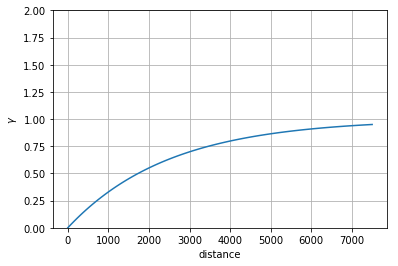

In [10]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=2500.0)
gs = pyemu.geostats.GeoStruct(variograms=v,nugget=0.0)
ax = gs.plot()
ax.grid()
ax.set_ylim(0,2.0)

Now we need to know where the pilot points are.  We can get this from the pilot point template file:

In [12]:
# make a dataframe called df_pp using pyemu helper and the pilot point template file hkpp.dat.tpl
df_pp = pyemu.pp_utils.pp_tpl_to_dataframe(os.path.join(working_dir,"hkpp.dat.tpl"))

Now let's build a covariance matrix from the geostatistical structure

In [17]:
# define a covariance matrix called cov using pyemu's geostatistics capabilities
cov = gs.covariance_matrix(df_pp.x,df_pp.y,df_pp.parnme)

In [23]:
# use the pyemu helper to construct preferred difference regularization equations 
# using the covariance for regularization weight
pyemu.helpers.first_order_pearson_tikhonov(pst,cov)

In [19]:
# print the new regularization equations out
pst.prior_information

,equation,obgnme,pilbl,weight
pilbl,,,,
pcc_497,1.0 * log(hk00) - 1.0 * log(hk01) = 0.0,regul_cc,pcc_497,0.670320
pcc_498,1.0 * log(hk00) - 1.0 * log(hk02) = 0.0,regul_cc,pcc_498,0.449329
pcc_499,1.0 * log(hk00) - 1.0 * log(hk03) = 0.0,regul_cc,pcc_499,0.301194
pcc_500,1.0 * log(hk00) - 1.0 * log(hk04) = 0.0,regul_cc,pcc_500,0.670320
pcc_501,1.0 * log(hk00) - 1.0 * log(hk05) = 0.0,regul_cc,pcc_501,0.567971
pcc_502,1.0 * log(hk00) - 1.0 * log(hk06) = 0.0,regul_cc,pcc_502,0.408842
pcc_503,1.0 * log(hk00) - 1.0 * log(hk07) = 0.0,regul_cc,pcc_503,0.282264
pcc_504,1.0 * log(hk00) - 1.0 * log(hk08) = 0.0,regul_cc,pcc_504,0.449329
pcc_505,1.0 * log(hk00) - 1.0 * log(hk09) = 0.0,regul_cc,pcc_505,0.322591


What happened?  We replace the preferred value equations with a bunch of new equations.  These equations each include two parameter names and have different weights - can you guess what the weights are?  The weights are the pearson correlation coefficients (CC) between the pilot points (remember those from way back?).  These CC values are calculated from the covariance matrix, which is implied by the geostatistical structure...whew! For example, ``hk00`` is "close" to ``hk01``, so they have a high CC value (equation 1).  Just for fun, go back and change the "a" parameter in the variogram and see how it changes the CC values.

### Handy hint:  you can use both preferred value and preferred difference regularization in the same PEST control file, and even on the same parameter!

Tikhonov regularization is a go-to tool, and we'll dedicate an entire notebook to applying Tikhonov to our overfit pilot point calibration.  But, before we go let's think of regularization in the broadest context....

### Recall that regularization refers to any approach that makes an illposed/underdetermined parameter estimation problem solvable.  

Therefore, when you manually reduce the number of parameters such as zones you are doing a type of regularization.  

# So why not Truncated Singular Value Decomposition (TSVD) as a regularization device?

<img src="PEST++V3_cover.jpeg" style="float: left">

<img src="flopylogo.png" style="float: right">

<img src="AW&H2015.png" style="float: center">



Singular Value Decomposition can be thought of as operating in a similar fashion as you manually changing zones but is automated, and more clever.  Using the Jacobian matrix, it reduces the number of base parameters by making a reduced set of linear combinations of the base parameters.  Thus two perfectly correlated parameters become 1 combined parameter, which helps give a unique solution to the parameter estimation problem. Those linear combinations (__=singular values__) that are in the noise (__=null space__) get truncated (__=removed from the parameter estimation process__).  This means that insensitive parameters don't adversely affect the parameter estimation process.  Those linear combinations that remain (__=solution space__) are then used to solve the parameters estimation problem.  

This truncated SVD approach makes for a parameter estimation process that is __*unconditionally stable*__, which means it is guaranteed to be well-posed, and solvable. __But the number of singular values also controls, in a somewhat brute force way, the degree of parameter smoothing and fit. The key to stability and degree of smoothing is this truncation process, which we'll dig into here.__


# Let's see what TSVD does for our pilot point overfitting

First, let's make the Jacobian matrix at the starting conditions

In [21]:
inpst = pyemu.Pst(os.path.join(working_dir,'freyberg_pp.pst'))
# tell PEST that you only want a Jacobian matrix, which is NOPTMAX=-1
inpst.control_data.noptmax=-1
# have pyemu write out PEST files where the control file is called freyberg_jac.pst
inpst.write(os.path.join(working_dir,'freyberg_jac.pst'))


### Now start 15 workers to run the Jacobian
(wait for it, wait for it...)

In [26]:
os.chdir('freyberg_pp')
pyemu.helpers.start_slaves('.',"pestpp",'freyberg_jac.pst',num_slaves=15,master_dir='.')
os.chdir('..')

Now we have a Jacobian matrix

## now let's look at the singular value spectrum

/Users/rjhunt1/miniconda3/envs/ppp/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


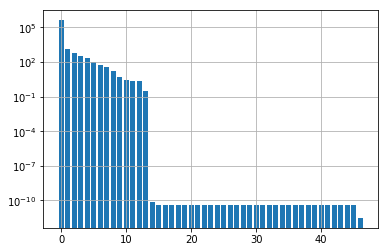

In [31]:
# read in the  Jacobian and, form the Schur complement 
injac = pyemu.Schur(os.path.join(working_dir,'freyberg_jac.jcb'))
# do the SVD linear algebra
U,S,V = np.linalg.svd(injac.xtqx.df())
# plot it up
plt.bar(range(len(S)),S)
plt.yscale('log')
plt.grid('on')

Note the log scale on the y-axis.  Quite a spread! Recall the higher the bar the more information that supports the linear combination of base parameters in the singular value

# So what if we only use superparameters comprising the first 2 singular vectors?

In [34]:
# take the existing PEST control file and change some PEST++ options
inpst = pyemu.Pst(os.path.join(working_dir,'freyberg_pp.pst'))
# run a lot iterations so it finds an optimal parameter set
inpst.pestpp_options['n_iter_super'] = 100
# set the number of singular values to 2
inpst.pestpp_options['max_n_super'] = 2
# echo out the PEST++ options that we have so far
inpst.pestpp_options

{'forecasts': 'travel_time,fa_headwaters_0001,c001fr16c17_19791231,c001fr05c04_19791231',
 'n_iter_base': '-1',
 'n_iter_super': 100,
 'lambda_scale_fac': '1.0',
 'upgrade_augment': 'false',
 'lambdas': '0.1,1.0,10.0',
 'max_n_super': 2}

In [35]:
# write the new PEST control file 
inpst.write(os.path.join(working_dir,'freyberg_TSVD.pst'))


In [36]:
# Now run a parameter estimation with 15 workers
os.chdir('freyberg_pp')
pyemu.helpers.start_slaves('.',"pestpp",'freyberg_TSVD.pst',num_slaves=15,master_dir='.')
os.chdir('..')


In [39]:
# make table that uses the PEST++ csv file output from the .iobj file
indf = pd.read_csv(os.path.join(working_dir,'freyberg_TSVD.iobj'))
# echo out the table we just defined
indf

,iteration,model_runs_completed,total_phi,measurement_phi,regularization_phi,calflux,calhead,flaqx,flout,flx_constan,...,forecast,pothead,vol_constan,vol_in-out,vol_percent,vol_recharg,vol_storage,vol_stream_,vol_total,vol_wells
0,0,0,1317.040,1317.040,0,80.192000,1236.850,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,54,686.188,686.188,0,0.030625,686.157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,62,669.304,669.304,0,0.000100,669.304,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,72,669.232,669.232,0,0.001600,669.231,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,82,669.232,669.232,0,0.001600,669.231,0,0,0,...,0,0,0,0,0,0,0,0,0,0


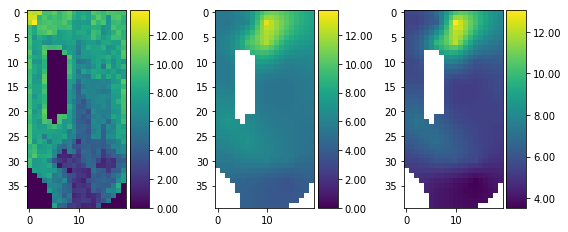

<Figure size 432x288 with 0 Axes>

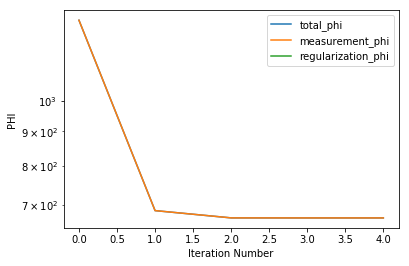

In [43]:
# change directory
os.chdir('freyberg_pp')
# update the HK field with the new optimal values
th.update_K('freyberg_TSVD.pst')
# change directory
os.chdir('..')
# plot out results
th.plot_K_results(working_dir, 'freyberg_TSVD')

### The left HK field is "truth", the other two are the optimal field with two different ranges for the color flood.  Looks smoother....and there still was a pretty big reduction in Phi....


# How does this compare with the pilot points solution?

Here's a jpeg of the previous results.  You can re-run the problem by executing the optional code blocks below, but be advised that it takes a while to run....

<img src="Freyberg_overfit_pilot_point_run.jpeg" style="float: center">


### Yes the fields with TSVD = 2 singular values is much smoother than the original parameter estimation with no regularization.  So, TSVD can be a regularization device!


# OPTIONAL CODE to rerun pilot point version

(and recreate the jpeg figure above)

In [44]:
inpst = pyemu.Pst(os.path.join(working_dir,'freyberg_pp.pst'))


In [45]:
os.chdir('freyberg_pp')
pyemu.helpers.start_slaves('.',"pestpp",'freyberg_pp.pst',num_slaves=15,master_dir='.')
os.chdir('..')

In [46]:
os.chdir('freyberg_pp')
th.update_K('freyberg_pp.pst')
os.chdir('..')
pst.phi

251.23208218057275

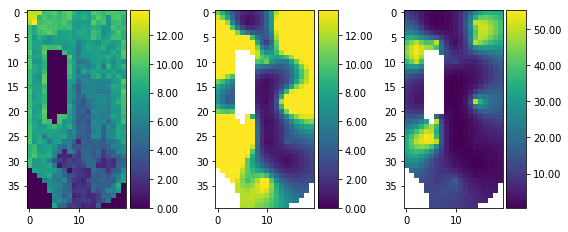

<Figure size 432x288 with 0 Axes>

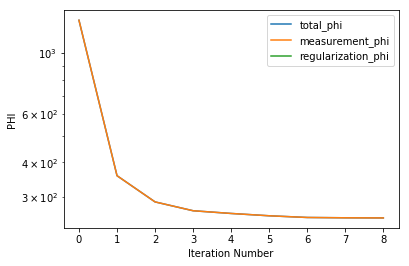

In [47]:
th.plot_K_results(working_dir, 'freyberg_pp')